In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import warnings
import itertools
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def cargar(fold="sin adulterar", one_row=False, clase=0):
    fold = "data/{}".format(fold)
    aux = pd.DataFrame()
    files = os.listdir(fold+"/")
    for f in files:
        dfu = pd.read_csv(fold+"/"+f, index_col=[0], names=["amp"])
        if one_row:
            dfu = dfu.T
        dfu["clase"] = clase
        aux = pd.concat([aux, dfu], ignore_index=True)
    return aux

In [3]:
sin = cargar(one_row=True)
sin = pd.DataFrame(sin.mean(axis=0)).T
sin

,3999.7059999999997,4003.563,4007.42,4011.277,4015.134,4018.991,4022.848,4026.705,4030.562,4034.4190000000003,...,9970.337,9974.193000000001,9978.051,9981.907,9985.765,9989.621,9993.479,9997.335,10001.19,clase
0,0.154917,0.156954,0.158655,0.159865,0.160638,0.160863,0.1605,0.159548,0.158182,0.156337,...,-0.062286,-0.061983,-0.061783,-0.061611,-0.06139,-0.061183,-0.061016,-0.060826,-0.060624,0.0


In [4]:
folds = os.listdir("data/")
# folds.remove(".ipynb_checkpoints")
# folds.remove("Revision.ipynb")
# folds.remove("Plots.ipynb")
# folds.remove("img")
folds.remove("sin adulterar")

In [5]:
adulterados = {}
for f in folds:
    adulterados[f] = cargar(f, one_row=True)
    adulterados[f] = pd.DataFrame(adulterados[f].mean(axis=0)).T

restados = {}
for k, v in adulterados.items():
    restados[k] = sin - v

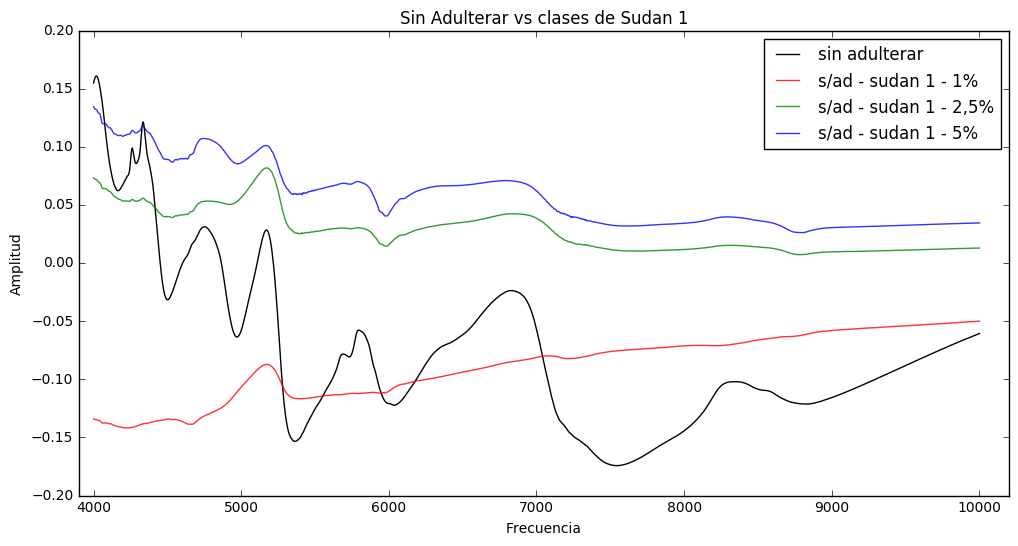

In [6]:
plt.figure("s_adulterar_vs_sudan 1", figsize=(12,6))
plt.title("Sin Adulterar vs clases de Sudan 1")
x = [np.float(i) for i in sin.columns[:-1]]

plt.plot(x, sin.iloc[:,:-1].values[0], alpha=1, c="black", label="sin adulterar")
plt.plot(x, restados["sudan 1 - 1%"].iloc[:,:-1].values[0], alpha=.8, c="r", label="s/ad - sudan 1 - 1%")
plt.plot(x, restados["sudan 1 - 2,5%"].iloc[:,:-1].values[0], alpha=.8, c="g", label="s/ad - sudan 1 - 2,5%")
plt.plot(x, restados["sudan 1 - 5%"].iloc[:,:-1].values[0], alpha=.8, c="b", label="s/ad - sudan 1 - 5%")

plt.xlim(xmin=3900, xmax=10200)
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.legend(loc=1)
plt.savefig("img/s_adulterar vs sudan_1.png")
plt.show()

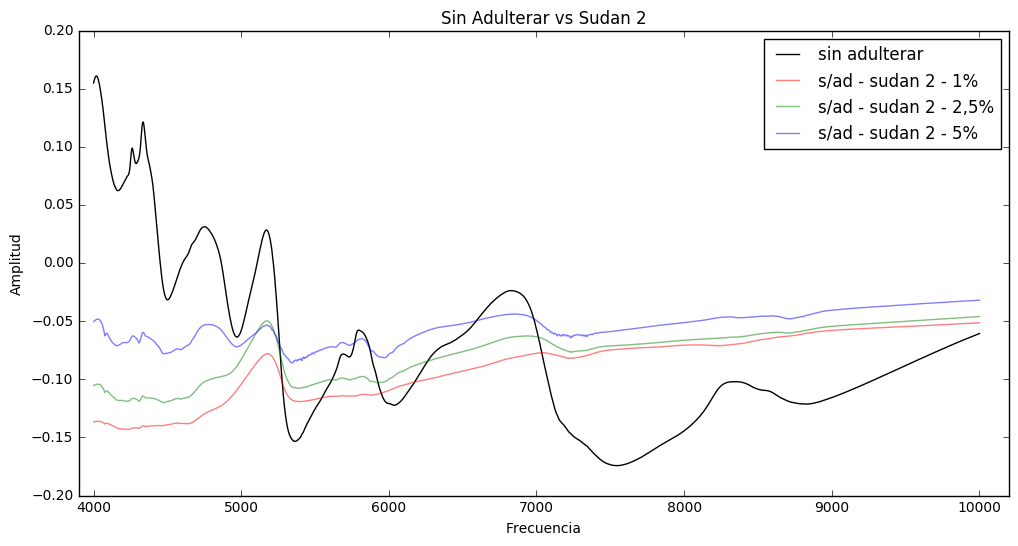

In [7]:
plt.figure("s_adulterar_Sudan 2", figsize=(12,6))
plt.title("Sin Adulterar vs Sudan 2")
x = [np.float(i) for i in sin.columns[:-1]]

plt.plot(x, sin.iloc[:,:-1].values[0], alpha=1, c="black", label="sin adulterar")
plt.plot(x, restados["sudan 2 - 1%"].iloc[:,:-1].values[0], alpha=.5, c="r", label="s/ad - sudan 2 - 1%")
plt.plot(x, restados["sudan 2 - 2,5%"].iloc[:,:-1].values[0], alpha=.5, c="g", label="s/ad - sudan 2 - 2,5%")
plt.plot(x, restados["sudan 2 - 5%"].iloc[:,:-1].values[0], alpha=.5, c="b", label="s/ad - sudan 2 - 5%")

plt.xlim(xmin=3900, xmax=10200)

plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.legend(loc=1)
plt.savefig("img/s_adulterar_vs_sudan_2.png")
plt.show()

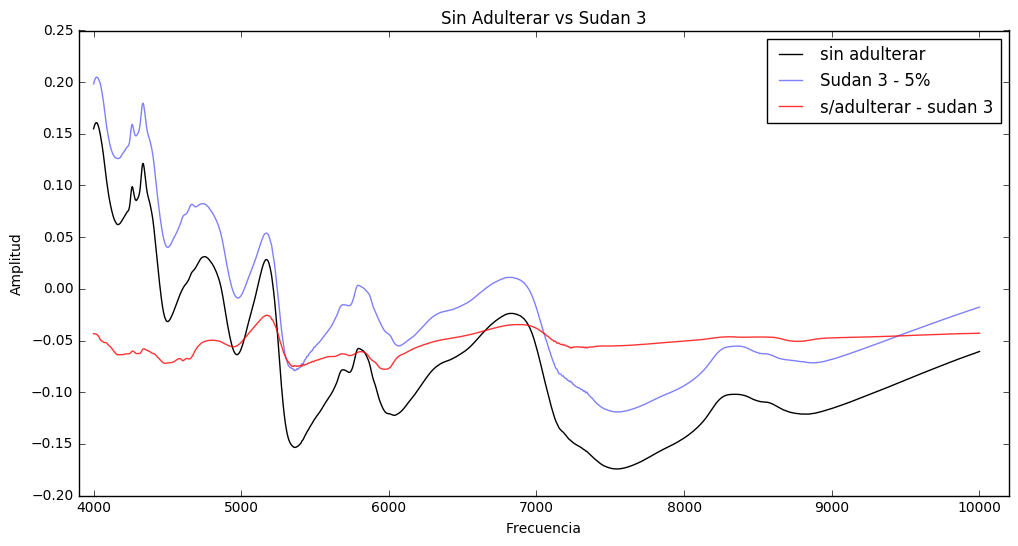

In [8]:
plt.figure("s_adulterar_vs_sudan 3", figsize=(12,6))
plt.title("Sin Adulterar vs Sudan 3")
x = [np.float(i) for i in sin.columns[:-1]]

plt.plot(x, sin.iloc[:,:-1].values[0], alpha=1, c="black", label="sin adulterar")
plt.plot(x, adulterados["sudan 3 - 5%"].iloc[:,:-1].values[0], alpha=.5, c="b", label="Sudan 3 - 5%")
plt.plot(x, restados["sudan 3 - 5%"].iloc[:,:-1].values[0], alpha=.8, c="r", label="s/adulterar - sudan 3")

plt.xlim(xmin=3900, xmax=10200)
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.legend(loc=1)
plt.savefig("img/s_adulterar_vs_sudan_3.png")
plt.show()

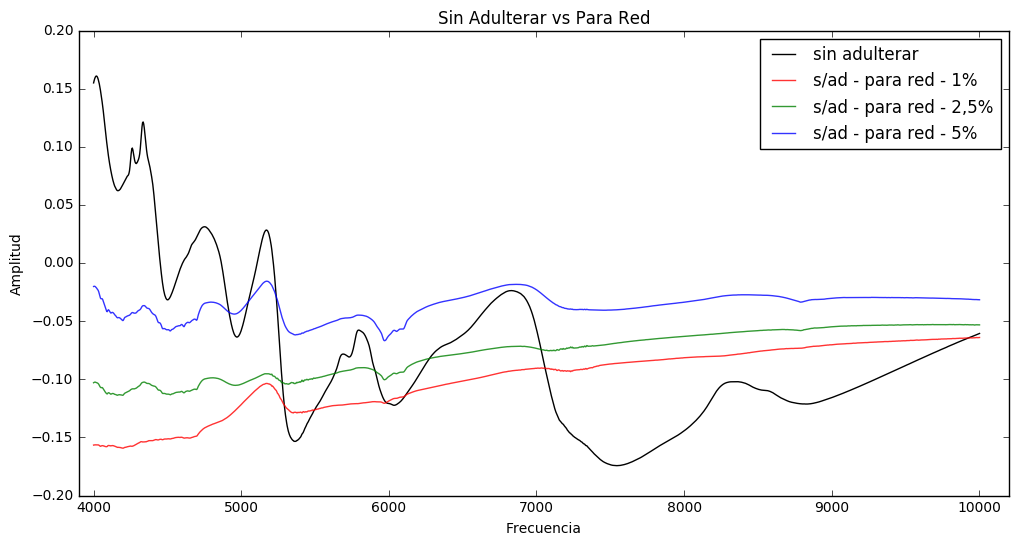

In [9]:
plt.figure("s_adulterar_vs_Para Red", figsize=(12,6))
plt.title("Sin Adulterar vs Para Red")
x = [np.float(i) for i in sin.columns[:-1]]

plt.plot(x, sin.iloc[:,:-1].values[0], alpha=1, c="black", label="sin adulterar")
plt.plot(x, restados["para red - 1%"].iloc[:,:-1].values[0], alpha=.8, c="r", label="s/ad - para red - 1%")
plt.plot(x, restados["para red - 2,5%"].iloc[:,:-1].values[0], alpha=.8, c="g", label="s/ad - para red - 2,5%")
plt.plot(x, restados["para red - 5%"].iloc[:,:-1].values[0], alpha=.8, c="b", label="s/ad - para red - 5%")

plt.xlim(xmin=3900, xmax=10200)

plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.legend(loc=1)
plt.savefig("img/s_adulterar_vs_para_red.png")
plt.show()

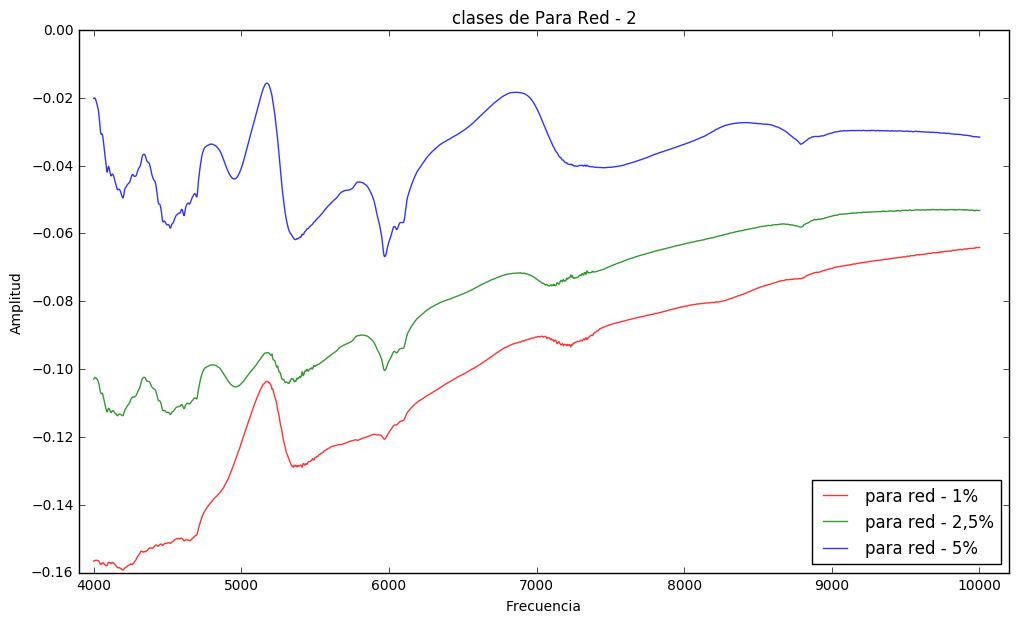

In [10]:
plt.figure("plot para red - 2", figsize=(12,7))
plt.title("clases de Para Red - 2")
x = np.array([np.float(i) for i in sin.columns[:-1]])

plt.plot(x, restados["para red - 1%"].iloc[:,:-1].values[0], alpha=.8, c="r", label="para red - 1%", )
plt.plot(x, restados["para red - 2,5%"].iloc[:,:-1].values[0], alpha=.8, c="g", label="para red - 2,5%")
plt.plot(x, restados["para red - 5%"].iloc[:,:-1].values[0], alpha=.8, c="b", label="para red - 5%")

plt.xlim(xmin=3900, xmax=10200)

plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.legend(loc=4)
plt.savefig("img/plot_para_red.png")
plt.show()